In [59]:
#import modules needed for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
#read the csv file to transfer all the data into "data"
data = pd.read_csv('customers.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [17]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype('float32') # Force empty values to be "Nan"
data["SeniorCitizen"]=data["SeniorCitizen"].astype("object")

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [42]:
data.Churn.replace({'No': 0, 'Yes': 1})

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [56]:
y=data['Churn'].values
X = data.iloc[:, 1:20].values
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

### Logistic regression MonthlyCharges

In [44]:
X_train_1D = X_train[:, 18, np.newaxis]
X_test_1D = X_test[:, 18, np.newaxis]
classifier = LogisticRegression().fit(X_train_1D, y_train)

accuracy = classifier.score(X_test_1D, y_test)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

Classification accuracy: 73.46%


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


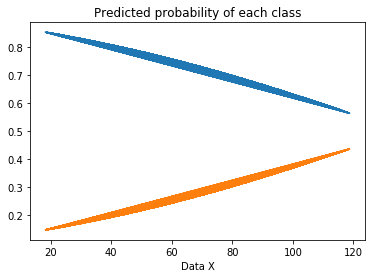

In [47]:
proba = classifier.predict_proba(X[:,18,np.newaxis])
plt.plot(X[:,18], proba)
plt.title('Predicted probability of each class')
plt.xlabel('Data X')
plt.show()

### Logistic regression tenure

In [48]:
X_train_1D = X_train[:, 5, np.newaxis]
X_test_1D = X_test[:, 5, np.newaxis]
classifier = LogisticRegression().fit(X_train_1D, y_train)

accuracy = classifier.score(X_test_1D, y_test)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

Classification accuracy: 75.16%


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


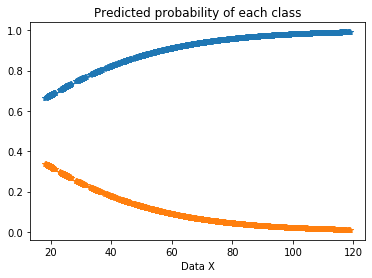

In [50]:
proba = classifier.predict_proba(X[:,18,np.newaxis])
plt.plot(X[:,18], proba, '*')
plt.title('Predicted probability of each class')
plt.xlabel('Data X')
plt.show()

Logistic regression doesn't seem appropriate for thi type of problems

C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(33.0, 0.5, 'predicted label')

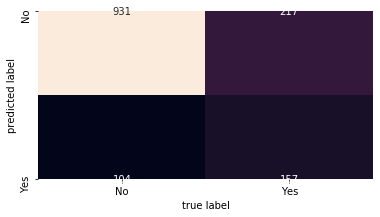

In [60]:
X = data.iloc[:, 1:20]
dfX= pd.get_dummies(X, columns= [i for i in X.columns if X[i].dtypes=='object'],drop_first=True)

y=data['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(dfX, y,stratify=y, test_size=0.2)

classifier= RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [61]:
dfX.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
